In [1]:
import numpy as np
import pandas as pd
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [3]:
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, \
        f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\65842\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\65842\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\65842\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\65842\Anaconda3\lib\site-packages\tensorboard\comp

# Prepare Data

In [4]:
df = pd.read_csv("gaze_labels.csv", index_col = "Participant_ID")

In [5]:
df.head()

,PHQ_Score,PHQ_Binary
Participant_ID,,
300,2,0
301,3,0
302,4,0
303,0,0
304,6,0


In [6]:
# X = np.load("gaze_features.npy")
X = np.load("avg_gaze.npy")
y = df['PHQ_Binary']

In [155]:
X_f0 = X[:,0:3]
X_f1 = X[:,3:6]
X_fh0 = X[:,6:9]
X_fh1 = X[:,9:12]

X_f01 = X[:,0:6]
X_fh0h1 = X[:,6:12]

In [109]:
def train_test(X, y, testfile='test_split_Depression_AVEC2017.csv'):
    test_participants = pd.read_csv(testfile)['participant_ID'].values
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    for i in range(y.shape[0]):
        participant_no = y.index[i]
        if participant_no in test_participants:
            X_test.append(X[i])
            y_test.append(y[participant_no])
        else:
            X_train.append(X[i])
            y_train.append(y[participant_no])
    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [9]:
X_train, X_test, y_train, y_test = train_test(X, y, '../test_split_Depression_AVEC2017.csv')

In [10]:
X_test.shape

(45, 12)

In [156]:
X_train_f0, X_test_f0, y_train, y_test = train_test(X_f0, y, '../test_split_Depression_AVEC2017.csv')
X_train_f1, X_test_f1, y_train, y_test = train_test(X_f1, y, '../test_split_Depression_AVEC2017.csv')
X_train_fh0, X_test_fh0, _, _ = train_test(X_fh0, y, '../test_split_Depression_AVEC2017.csv')
X_train_fh1, X_test_fh1, _, _ = train_test(X_fh1, y, '../test_split_Depression_AVEC2017.csv')

X_train_f01, X_test_f01, y_train, y_test = train_test(X_f01, y, '../test_split_Depression_AVEC2017.csv')
X_train_fh0h1, X_test_fh0h1, y_train, y_test = train_test(X_fh0h1, y, '../test_split_Depression_AVEC2017.csv')

In [157]:
RANDOM_STATE = 42
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [298]:
# X_train.shape

In [299]:
# X_train, y_train =balance_data(X_train,y_train)

In [300]:
# # the ratio of minority class to majority class will be 1 after resampling
# us = RandomUnderSampler(sampling_strategy=1, random_state=RANDOM_STATE)

# X_train, y_train = us.fit_sample(X_train, y_train)

In [301]:
# os = SMOTE() 
# X_train, y_train = os.fit_sample(X_train, y_train)

In [333]:
X_train[0]

array([ 0.0913719 ,  0.21656776, -0.96667616, -0.19744762,  0.22993486,
       -0.9465671 ,  0.07278096,  0.55364203, -0.80668276, -0.20840219,
        0.54517854, -0.78575543])

In [346]:
# separate depressed and non-depressed samples to plot
dep = []
non_dep = []
for i in range(y_train.shape[0]):
    if y_train[i] == 1:
        dep.append(X_train[i])
    else:
        non_dep.append(X_train[i])
dep = np.array(dep)
non_dep = np.array(non_dep)

Text(0.5, 0, 'z0')

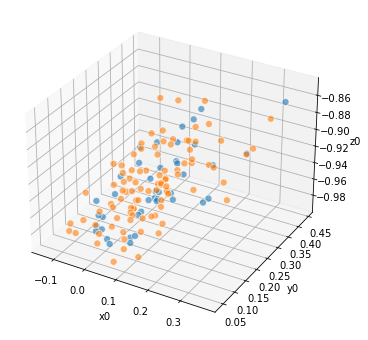

In [349]:
fig = plt.figure(figsize=(8, 6))
ax0 = fig.add_subplot(111, projection='3d')

xd = dep[:,0]
yd = dep[:,1]
zd = dep[:,2]
ax0.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

xn = non_dep[:,0]
yn = non_dep[:,1]
zn = non_dep[:,2]
ax0.scatter(xn, yn, zn, s=50, alpha=0.6, edgecolors='w')


ax0.set_xlabel('x0')
ax0.set_ylabel('y0')
ax0.set_zlabel('z0')

Text(0.5, 0, 'z1')

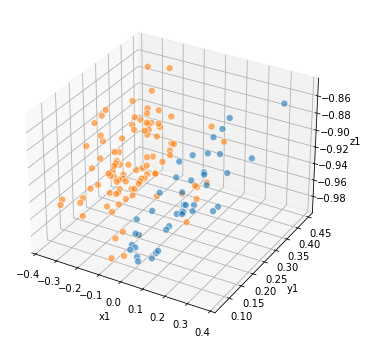

In [350]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111, projection='3d')

xd = dep[:,3]
yd = dep[:,4]
zd = dep[:,5]
ax1.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

xn = non_dep[:,3]
yn = non_dep[:,4]
zn = non_dep[:,5]
ax1.scatter(xn, yn, zn, s=50, alpha=0.6, edgecolors='w')


ax1.set_xlabel('x1')
ax1.set_ylabel('y1')
ax1.set_zlabel('z1')

Text(0.5, 0, 'z_h0')

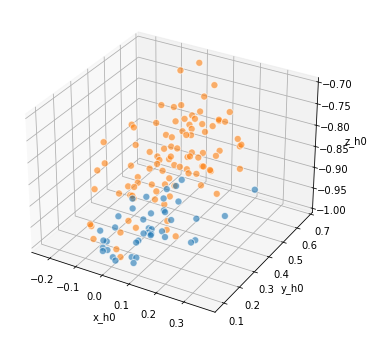

In [351]:
fig = plt.figure(figsize=(8, 6))
axh0 = fig.add_subplot(111, projection='3d')

xd = dep[:,6]
yd = dep[:,7]
zd = dep[:,8]
axh0.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

xn = non_dep[:,6]
yn = non_dep[:,7]
zn = non_dep[:,8]
axh0.scatter(xn, yn, zn, s=50, alpha=0.6, edgecolors='w')


axh0.set_xlabel('x_h0')
axh0.set_ylabel('y_h0')
axh0.set_zlabel('z_h0')

Text(0.5, 0, 'z_h1')

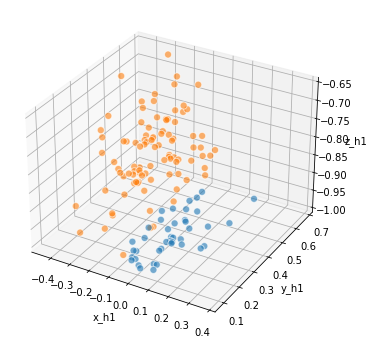

In [401]:
fig = plt.figure(figsize=(8, 6))
axh1 = fig.add_subplot(111, projection='3d')

xd = dep[:,9]
yd = dep[:,10]
zd = dep[:,11]
axh1.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

xn = non_dep[:,9]
yn = non_dep[:,10]
zn = non_dep[:,11]
axh1.scatter(xn, yn, zn, s=50, alpha=0.6, edgecolors='w')


axh1.set_xlabel('x_h1')
axh1.set_ylabel('y_h1')
axh1.set_zlabel('z_h1')

# Evaluation Metrics

In [158]:
def evaluate_on_training_set(y_test, y_pred):
    # Calculate AUC
    print("AUC is: ", roc_auc_score(y_test, y_pred))

    # print out recall and precision
    print(classification_report(y_test, y_pred))

    # print out confusion matrix
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

    # # calculate points for ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_pred))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')

# k cross

In [159]:
def k_cross(model, X, y, k=10, n=1, random_state=RANDOM_STATE):
    f1_scores = []
    recall_scores = []
    rkf = RepeatedKFold(n_splits=k, n_repeats=n, random_state=RANDOM_STATE)
    for train_index, val_index in rkf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        model.fit(X_train, y_train) 
        
        y_pred = model.predict(X_val)
        f1 = f1_score(y_val, y_pred)
        f1_scores.append(f1)
        recall = recall_score(y_val, y_pred)
        recall_scores.append(recall)
        
    return f1_scores, recall_scores

# Evaluation

In [160]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(y_pred)
    print(y_test)
    evaluate_on_training_set(y_test, y_pred)
    
    return model

# Logistic Regression

In [161]:
def find_best_logreg_model(power, X_train, y_train):
    best_f1_model = None
    best_recall_model = None
    best_f1 = -1
    best_recall = -1
    
    for i in range(power + 1):
        model = LogisticRegression(n_jobs=3, C=10**i)
        
        f1_scores, recall_scores = k_cross(model, X_train, y_train)
        f1 = np.mean(f1_scores)
        recall = np.mean(recall_scores)

        if f1 > best_f1:
            print(f"power: {i}: f1 = {f1} > best f1 = {best_f1}")
            best_f1 = f1
            best_f1_model = model

        if recall > best_recall:
            print(f"power: {i}: recall = {recall} > best recall = {best_recall}")
            best_recall = recall
            best_recall_model = model
    
    return best_f1_model, best_recall_model

best_logreg_f1_model, best_logreg_recall_model = find_best_logreg_model(6, X_train_f01, y_train)

power: 0: f1 = 0.0 > best f1 = -1
power: 0: recall = 0.0 > best recall = -1


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0]
AUC is:  0.5
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        31
           1       0.00      0.00      0.00        14

    accuracy                           0.69        45
   macro avg       0.34      0.50      0.41        45
weighted avg       0.47      0.69      0.56        45

Confusion Matrix: 
 [[31  0]
 [14  0]]


C:\Users\65842\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression(C=1, n_jobs=3)

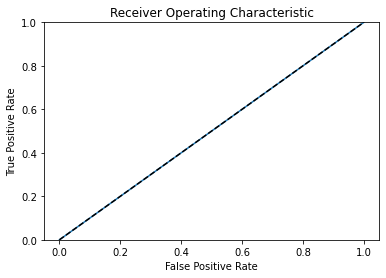

In [163]:
# Based on f1
evaluate_model(best_logreg_f1_model, X_train_f01, y_train, X_test_f01, y_test)

# Decision Tree

In [164]:
def find_best_tree_model(upper_depth, upper_leaf, X_train, y_train):
    best_f1_model = None
    best_recall_model = None
    best_f1 = -1
    best_recall = -1
    
    for depth in range(1, upper_depth + 1):
        for leaf in range(1, upper_leaf + 1):
            model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth, min_samples_leaf=leaf) 
            
            f1_scores, recall_scores = k_cross(model, X_train, y_train)
            f1 = np.mean(f1_scores)
            recall = np.mean(recall_scores)
            
            if f1 > best_f1:
                print(f"depth: {depth}, leaf: {leaf}: f1 = {f1} > best f1 = {best_f1}")
                best_f1 = f1
                best_f1_model = model
                
            if recall > best_recall:
                print(f"depth: {depth}, leaf: {leaf}: recall = {recall} > best recall = {best_recall}")
                best_recall = recall
                best_recall_model = model
    
    return best_f1_model, best_recall_model

best_tree_f1_model, best_tree_recall_model = find_best_tree_model(20, 30, X_train_f01, y_train)

depth: 1, leaf: 1: f1 = 0.03333333333333333 > best f1 = -1
depth: 1, leaf: 1: recall = 0.025 > best recall = -1
depth: 1, leaf: 15: f1 = 0.08333333333333333 > best f1 = 0.03333333333333333
depth: 1, leaf: 15: recall = 0.075 > best recall = 0.025
depth: 2, leaf: 1: f1 = 0.09166666666666665 > best f1 = 0.08333333333333333
depth: 2, leaf: 4: f1 = 0.125 > best f1 = 0.09166666666666665
depth: 2, leaf: 4: recall = 0.10595238095238095 > best recall = 0.075
depth: 2, leaf: 15: recall = 0.10833333333333332 > best recall = 0.10595238095238095
depth: 3, leaf: 4: f1 = 0.1285714285714286 > best f1 = 0.125
depth: 3, leaf: 5: f1 = 0.19523809523809524 > best f1 = 0.1285714285714286
depth: 3, leaf: 5: recall = 0.1545238095238095 > best recall = 0.10833333333333332
depth: 3, leaf: 15: f1 = 0.20326839826839826 > best f1 = 0.19523809523809524
depth: 3, leaf: 15: recall = 0.17357142857142857 > best recall = 0.1545238095238095
depth: 4, leaf: 4: f1 = 0.20388888888888887 > best f1 = 0.20326839826839826
depth

[0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0]
[0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0]
AUC is:  0.6048387096774194
              precision    recall  f1-score   support

           0       0.76      0.71      0.73        31
           1       0.44      0.50      0.47        14

    accuracy                           0.64        45
   macro avg       0.60      0.60      0.60        45
weighted avg       0.66      0.64      0.65        45

Confusion Matrix: 
 [[22  9]
 [ 7  7]]


DecisionTreeClassifier(max_depth=8, min_samples_leaf=6, random_state=42)

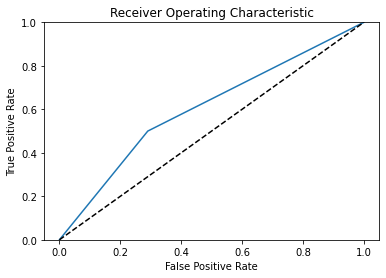

In [165]:
# Based on f1
evaluate_model(best_tree_f1_model, X_train_f01, y_train, X_test_f01, y_test)

[0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0]
[0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0]
AUC is:  0.6048387096774194
              precision    recall  f1-score   support

           0       0.76      0.71      0.73        31
           1       0.44      0.50      0.47        14

    accuracy                           0.64        45
   macro avg       0.60      0.60      0.60        45
weighted avg       0.66      0.64      0.65        45

Confusion Matrix: 
 [[22  9]
 [ 7  7]]


DecisionTreeClassifier(max_depth=8, min_samples_leaf=6, random_state=42)

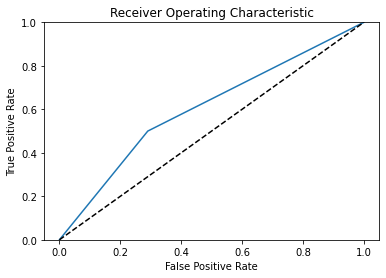

In [166]:
# Based on recall
evaluate_model(best_tree_recall_model, X_train_f01, y_train, X_test_f01, y_test)

# RF

In [117]:
def find_best_forest_model(n_estimators, X_train, y_train):
    best_f1_model = None
    best_recall_model = None
    best_f1 = -1
    best_recall = -1
    
    for estimator in range(1, n_estimators + 1):
        model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=estimator) 
        
        f1_scores, recall_scores = k_cross(model, X_train, y_train)
        f1 = np.mean(f1_scores)
        recall = np.mean(recall_scores)

        if f1 > best_f1:
            print(f"estimator: {estimator}: f1 = {f1} > best f1 = {best_f1}")
            best_f1 = f1
            best_f1_model = model

        if recall > best_recall:
            print(f"estimator: {estimator}: recall = {recall} > best recall = {best_recall}")
            best_recall = recall
            best_recall_model = model
    
    return best_f1_model, best_recall_model

best_forest_f1_model, best_forest_recall_model = find_best_forest_model(30, X_train_f0, y_train)

estimator: 1: f1 = 0.27645909645909644 > best f1 = -1
estimator: 1: recall = 0.31666666666666665 > best recall = -1


[1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 0]
[0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0]
AUC is:  0.6082949308755761
              precision    recall  f1-score   support

           0       0.77      0.65      0.70        31
           1       0.42      0.57      0.48        14

    accuracy                           0.62        45
   macro avg       0.60      0.61      0.59        45
weighted avg       0.66      0.62      0.63        45

Confusion Matrix: 
 [[20 11]
 [ 6  8]]


RandomForestClassifier(n_estimators=1, random_state=42)

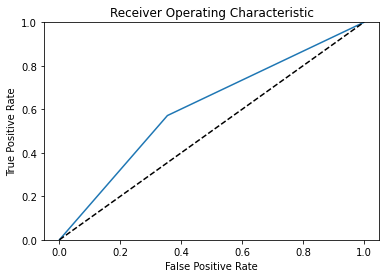

In [167]:
# Based on f1
evaluate_model(best_forest_f1_model, X_train_f01, y_train, X_test_f01, y_test)

[1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 0]
[0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0]
AUC is:  0.6082949308755761
              precision    recall  f1-score   support

           0       0.77      0.65      0.70        31
           1       0.42      0.57      0.48        14

    accuracy                           0.62        45
   macro avg       0.60      0.61      0.59        45
weighted avg       0.66      0.62      0.63        45

Confusion Matrix: 
 [[20 11]
 [ 6  8]]


RandomForestClassifier(n_estimators=1, random_state=42)

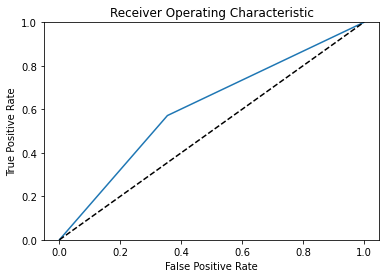

In [168]:
# Based on recall
evaluate_model(best_forest_recall_model, X_train_f01, y_train, X_test_f01, y_test)

# SVM with Grid Search

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 130 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    0.4s finished
C:\Users\65842\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0]
AUC is:  0.5
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        31
           1       0.00      0.00      0.00        14

    accuracy                           0.69        45
   macro avg       0.34      0.50      0.41        45
weighted avg       0.47      0.69      0.56        45

Confusion Matrix: 
 [[31  0]
 [14  0]]
Best SVM parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


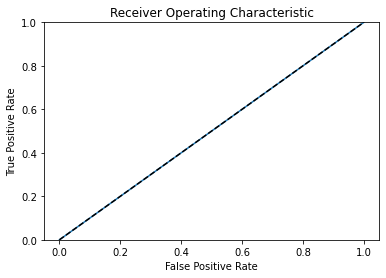

In [169]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100]},
                    {'kernel': ['poly'], 'degree': [3, 4, 5], 'C': [1, 10, 100]},
                    {'kernel': ['linear'], 'C': [1, 10, 100]}]

svm_model_cv = GridSearchCV(SVC(), tuned_parameters, cv=10, scoring='f1', verbose=1, n_jobs=4)

best_svm_model = evaluate_model(svm_model_cv, X_train_f01, y_train, X_test_f01, y_test)
print(f"Best SVM parameters: {best_svm_model.best_params_}")

In [176]:
class Ensemble:
    def __init__(self):
        self.clf = []
        self.X_train = []
        self.X_test = []
        self.y_train = None
        self.y_test = None
        
    def set_clf(self, ls_clf):
        self.clf = ls_clf
    
    def set_train_test(self, ls_train, ls_test, y_train, y_test):
        self.X_train = ls_train
        self.X_test = ls_test
        self.y_train = y_train
        self.y_test = y_test
        
    def train_ens(self):
        for i in range(len(self.clf)):
            c_i = self.clf[i]
            X_train_i = self.X_train[i]
            y_train = self.y_train
            c_i.fit(X_train_i, y_train)
            self.clf[i] = c_i
    
    def pred_proba(self, ls_X):
        probas = []
        for i in range(len(self.clf)):
            c_i = self.clf[i]
            probas.append(c_i.predict_proba(ls_X[i]))
        probas = np.array(probas)
        probas = np.mean(probas, axis=0)
        return probas
    
    def pred_ens(self, ls_X):
        probas = self.pred_proba(ls_X)
        label = np.argmax(probas)
        return label
    
    def evaluate_ens(self):
        predictions = []       
        for i in range(len(self.y_test)):
            ls_X = []
            for j in range(len(self.clf)):
                ls_X.append(self.X_test[j][i:i+1][:])
            predictions.append(e.pred_ens(ls_X))
        predictions = np.array(predictions)
        print(predictions)
        print(self.y_test)
        
        evaluate_on_training_set(self.y_test, predictions)
        

In [177]:
e = Ensemble()
# clf1 = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=1) 
# clf2 = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=1) 
clf3 = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=7, min_samples_leaf=9)
clf4 = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=1) 
# clf5 = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=5)
# clf6 = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=7, min_samples_leaf=11)
# clfs = [clf1, clf2, clf3, clf4]
clfs = [clf3, clf4]
e.set_clf(clfs)
# e.set_train_test([X_train_fh1, X_train_fh0, X_train_f1, X_train_f0], [X_test_fh1, X_test_fh0, X_test_f1, X_test_f0], y_train, y_test)
e.set_train_test([X_train_f1, X_train_f0], [X_test_f1, X_test_f0], y_train, y_test)

In [178]:
e.train_ens()

[1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0]
[0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0]
AUC is:  0.7246543778801843
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        31
           1       0.60      0.64      0.62        14

    accuracy                           0.76        45
   macro avg       0.72      0.72      0.72        45
weighted avg       0.76      0.76      0.76        45

Confusion Matrix: 
 [[25  6]
 [ 5  9]]


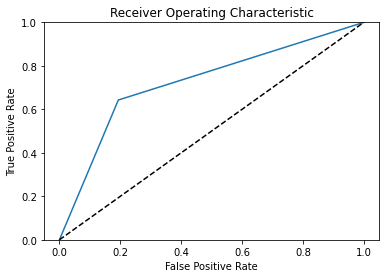

In [179]:
e.evaluate_ens()